In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
train = pd.read_csv('Google_Stock_Price_Train.csv')   
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
# Convert Date to datetime and sort
train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values('Date')
test['Date'] = pd.to_datetime(test['Date'])
test = test.sort_values('Date')

# Reset index
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
# For train: ensure it's string first, then remove commas and convert to float
train['Close'] = train['Close'].astype(str).str.replace(',', '', regex=True).astype(float)

# For test: check if it is string first
if test['Close'].dtype == object:  # object usually means string
    test['Close'] = test['Close'].str.replace(',', '', regex=True).astype(float)
else:
    test['Close'] = test['Close'].astype(float)  # just ensure float

In [ ]:
# Now apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train[['Close']])
scaled_test = scaler.transform(test[['Close']])

In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60  # using last 60 days to predict next day

X_train, y_train = create_sequences(scaled_train, sequence_length)
# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Prepare test sequences
total_data = pd.concat((train['Close'], test['Close']), axis=0)
inputs = total_data[len(total_data) - len(test) - sequence_length:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test, y_test = create_sequences(inputs, sequence_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
total_data = pd.concat((train['Close'], test['Close']), axis=0)
inputs = total_data[len(total_data) - len(test) - sequence_length:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test, y_test = create_sequences(inputs, sequence_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\chand\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0204 - val_loss: 6.0651e-04
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0067 - val_loss: 8.7196e-04
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0052 - val_loss: 0.0010
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0052 - val_loss: 6.0767e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0045 - val_loss: 5.2578e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0048 - val_loss: 3.1959e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0036 - val_loss: 5.5947e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0044 - val_loss: 4.2472e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - val_loss: 7.5293e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0043 - val_loss: 4.1075e-04
Epoch 12/50
34/34 ━━━━━━━━━

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
mae = mean_absolute_error(test['Close'], predicted_prices)
rmse = np.sqrt(mean_squared_error(test['Close'], predicted_prices))
r2 = r2_score(test['Close'], predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 13.78
Root Mean Squared Error (RMSE): 18.10
R² Score: -0.9770


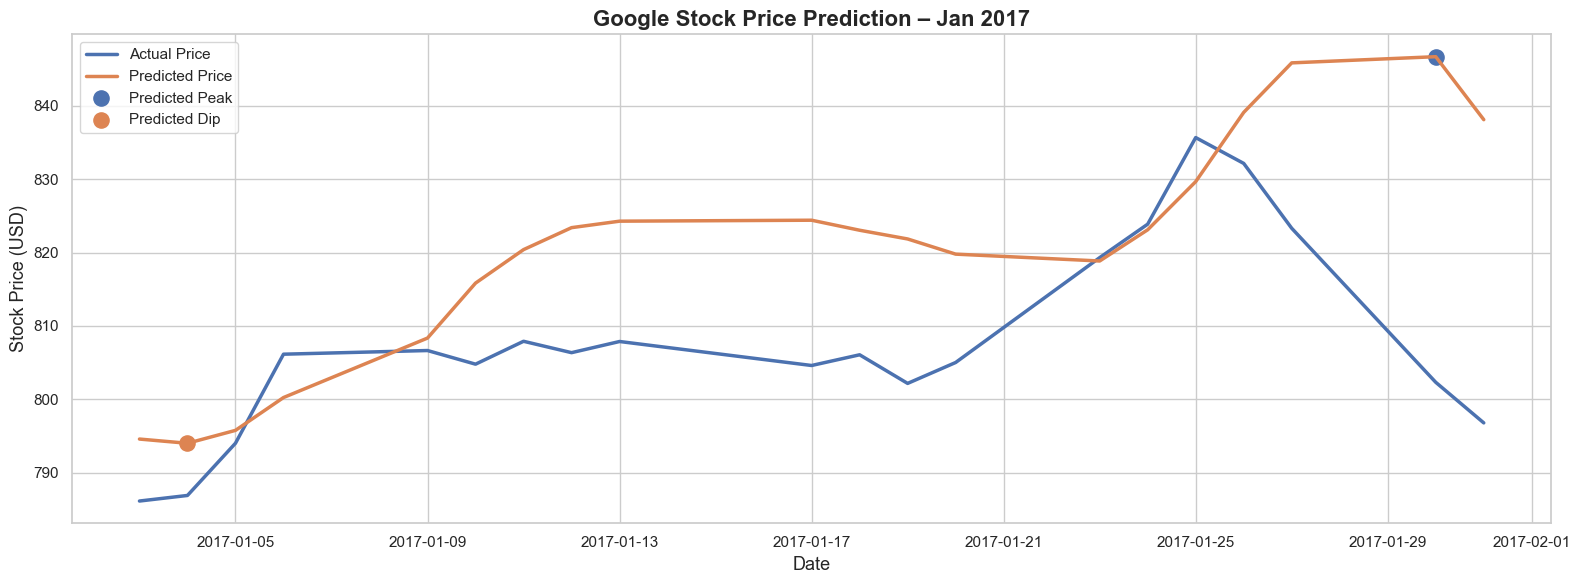

In [ ]:
# Set professional theme
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(16,6))

plt.plot(test['Date'], test['Close'],
         label='Actual Price',
         linewidth=2.5)

plt.plot(test['Date'], predicted_prices,
         label='Predicted Price',
         linewidth=2.5)

# Highlight peak and dip
max_idx = np.argmax(predicted_prices)
min_idx = np.argmin(predicted_prices)

plt.scatter(test['Date'].iloc[max_idx], predicted_prices[max_idx],
            s=120, label='Predicted Peak')

plt.scatter(test['Date'].iloc[min_idx], predicted_prices[min_idx],
            s=120, label='Predicted Dip')

plt.title('Google Stock Price Prediction – Jan 2017',
          fontsize=16, weight='bold')

plt.xlabel('Date', fontsize=13)
plt.ylabel('Stock Price (USD)', fontsize=13)

plt.legend(fontsize=11)
plt.tight_layout()

# Save high-quality figure for report
plt.savefig('Google_Stock_Price_Prediction_Professional.png', dpi=300)

plt.show()
